In [1]:
!pip install hub
import hub
ds = hub.load("hub://activeloop/300w")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 427 kB 8.6 MB/s 
     |████████████████████████████████| 76 kB 6.1 MB/s 
     |████████████████████████████████| 132 kB 15.2 MB/s 
     |████████████████████████████████| 6.6 MB 25.8 MB/s 
     |████████████████████████████████| 79 kB 8.7 MB/s 
     |████████████████████████████████| 9.1 MB 32.3 MB/s 
     |████████████████████████████████| 140 kB 41.5 MB/s 
     |████████████████████████████████| 52 kB 1.3 MB/s 
     |████████████████████████████████| 115 kB 4.1 MB/s 
     |████████████████████████████████| 127 kB 39.1 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
hub://activeloop/300w loaded successfully.
This dataset can be visualized in Jupyter Notebook by ds.visualize() or at https://app.activeloop.ai/activeloop/300w


[[643]
 [431]
 [  2]
 [645]
 [448]
 [  2]
 [652]
 [465]
 [  2]
 [661]
 [481]
 [  2]
 [672]
 [496]
 [  2]
 [685]
 [508]
 [  2]
 [702]
 [519]
 [  2]
 [715]
 [530]
 [  2]
 [731]
 [534]
 [  2]
 [751]
 [526]
 [  2]
 [771]
 [512]
 [  2]
 [785]
 [496]
 [  2]
 [797]
 [476]
 [  2]
 [805]
 [454]
 [  2]
 [808]
 [428]
 [  2]
 [805]
 [402]
 [  2]
 [796]
 [379]
 [  2]
 [642]
 [410]
 [  2]
 [648]
 [406]
 [  2]
 [657]
 [403]
 [  2]
 [667]
 [403]
 [  2]
 [678]
 [403]
 [  2]
 [700]
 [395]
 [  2]
 [709]
 [388]
 [  2]
 [721]
 [386]
 [  2]
 [732]
 [383]
 [  2]
 [745]
 [383]
 [  2]
 [691]
 [412]
 [  2]
 [693]
 [427]
 [  2]
 [694]
 [441]
 [  2]
 [696]
 [456]
 [  2]
 [686]
 [467]
 [  2]
 [695]
 [470]
 [  2]
 [704]
 [468]
 [  2]
 [717]
 [463]
 [  2]
 [726]
 [453]
 [  2]
 [654]
 [424]
 [  2]
 [660]
 [419]
 [  2]
 [670]
 [418]
 [  2]
 [680]
 [422]
 [  2]
 [671]
 [421]
 [  2]
 [661]
 [422]
 [  2]
 [715]
 [411]
 [  2]
 [722]
 [402]
 [  2]
 [730]
 [398]
 [  2]
 [741]
 [399]
 [  2]
 [733]
 [402]
 [  2]
 [723]
 [406]

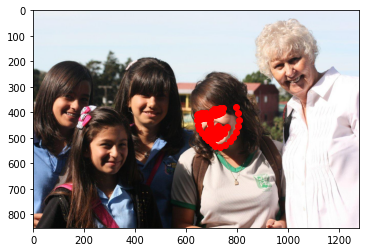

In [4]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure()
plt.imshow(ds.images[18].numpy())
for i in range(len(ds.keypoints[18].numpy(aslist=True))//3):
  x = ds.keypoints[18].numpy(aslist=True)[3*i]
  y = ds.keypoints[18].numpy(aslist=True)[3*i+1]
  plt.plot(x,y,marker='o',color='red')

print(ds.keypoints[18].numpy(aslist=True))


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Voir l'état du dataset
print(ds.tensors.keys())
# Dimensions des images
print(np.shape(ds.images[0].numpy()))
print(len(ds.images))
print(type(ds.images))
# print(ds.images[0], ds.images[1])
# print(ds.keypoints)
#print([ds.images[0].numpy(aslist=True),ds.images[1].numpy(aslist=True)])

# x=ds.keypoints[400].numpy(aslist=True)[0]
# y=ds.keypoints[400].numpy(aslist=True)[1]
# print()
# print(ds.keypoints[0].numpy(aslist=True))
# train_limite = int(0.8*len(ds.images))
# val_limite = int(0.1*len(ds.images))
# test_limite = int(0.1*len(ds.images))
# print(train_limite)
# print(val_limite)
# print(test_limite)
# print(train_limite+val_limite+test_limite)
# print(ds.images[:200])
# plt.figure()
# plt.imshow(ds.images[400].numpy())
# for i in range(68):
#   x=ds.keypoints[400].numpy(aslist=True)[3*i]
#   y=ds.keypoints[400].numpy(aslist=True)[3*i+1]
#   plt.plot(x,y,marker='o',color='red')


dict_keys(['images', 'keypoints', 'labels'])
(1536, 2048, 3)
599
<class 'hub.core.tensor.Tensor'>


## **Paramètres**






In [ ]:
import os 
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from tensorflow.keras.layers import * 

In [ ]:
# Paramètres du générateur
TRAINING_BATCH_SIZE = 84
VALIDATION_BATCH_SIZE = 84
TESTING_BATCH_SIZE = 84
SHUFFLE_DATA = True
TRAIN_SIZE = 0.8
VALIDATION_SIZE = 0.1
TEST_SIZE = 0.1

## **Générateur**

In [ ]:
def create_generators():

    train_limite = int(TRAIN_SIZE*len(ds.images))
    val_limite = int(VALIDATION_SIZE*len(ds.images))
    test_limite = int(TEST_SIZE*len(ds.images))
    if train_limite + val_limite + test_limite != 0:
      train_limite += len(ds.images) - (train_limite + val_limite + test_limite)
    train_list = list(range(train_limite))
    val_list = list(range(train_limite, train_limite + val_limite))
    test_list = list(range(train_limite + val_limite, len(ds.images)))

    train_data_generator = DataGeneratorClassifier(train_list, TRAINING_BATCH_SIZE)
    validation_data_generator = DataGeneratorClassifier(val_list, VALIDATION_BATCH_SIZE)
    test_data_generator = DataGeneratorClassifier(test_list, TESTING_BATCH_SIZE)
    return train_data_generator, validation_data_generator, test_data_generator

class DataGeneratorClassifier(tf.keras.utils.Sequence):
    'Generates data for Keras'
    def __init__(self, list_IDs, batch_size, shuffle=SHUFFLE_DATA):
        'Initialisation'
        self.batch_size = batch_size
        self.list_IDs = list_IDs
        self.shuffle = shuffle
        self.on_epoch_end()

    def __len__(self):
        'Denotes the number of batches per epoch'
        return int(np.floor(len(self.list_IDs) / self.batch_size))

    def __getitem__(self, index):
        'Generate one batch of data'
        indexes = self.indexes[index*self.batch_size:(index+1)*self.batch_size]
        list_IDs_temp = self.list_IDs[indexes]
        X, y = self.__data_generation(list_IDs_temp)
        
        return X, y

    def on_epoch_end(self):
        'Updates indexes after each epoch'
        self.indexes = np.arange(len(self.list_IDs))
        if self.shuffle == True:
            np.random.shuffle(self.indexes)

    def __data_generation(self, list_IDs_temp):
      X = np.empty((self.batch_size, *self.image_size, self.n_channels))
      y = np.empty((self.batch_size), dtype=int)

      for i, ID in enumerate(list_IDs_temp):
        Xi = ds.images[ID].numpy(aslist=True)
        print(Xi)
        for j in range(len(ds.keypoints[ID].numpy(aslist=True))//3):
          x_keypoint = ds.keypoints[ID].numpy(aslist=True)[3*j]
          y_keypoint = ds.keypoints[ID].numpy(aslist=True)[3*j+1]
        y[i] = [x_keypoint, y_keypoint]
        print(y[i])
        X[i,:] = Xi
      return X,y

# print(create_generators()[0])
# print(create_generators()[1])
create_generators()

(<__main__.DataGeneratorClassifier at 0x7f4d7e6a4190>,
 <__main__.DataGeneratorClassifier at 0x7f4d7e6a43d0>)